$\textbf{PROGRAMMING ASSIGNMENT}$
---

Data: https://archive.ics.uci.edu

Instructions: Choose a dataset of your liking and perform the following:

1. Create a Correlation Plot

2. Check the distribution of each column and determine which probability distiribution it fits.

3. Create a summary statistics.

4. Perform a hypothesis test (Code from scratch).

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install plotly

^C
Note: you may need to restart the kernel to use updated packages.


In [21]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
  
# metadata 
print(rice_cammeo_and_osmancik.metadata) 
  
# variable information 
print(rice_cammeo_and_osmancik.variables) 


{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent Systems and App

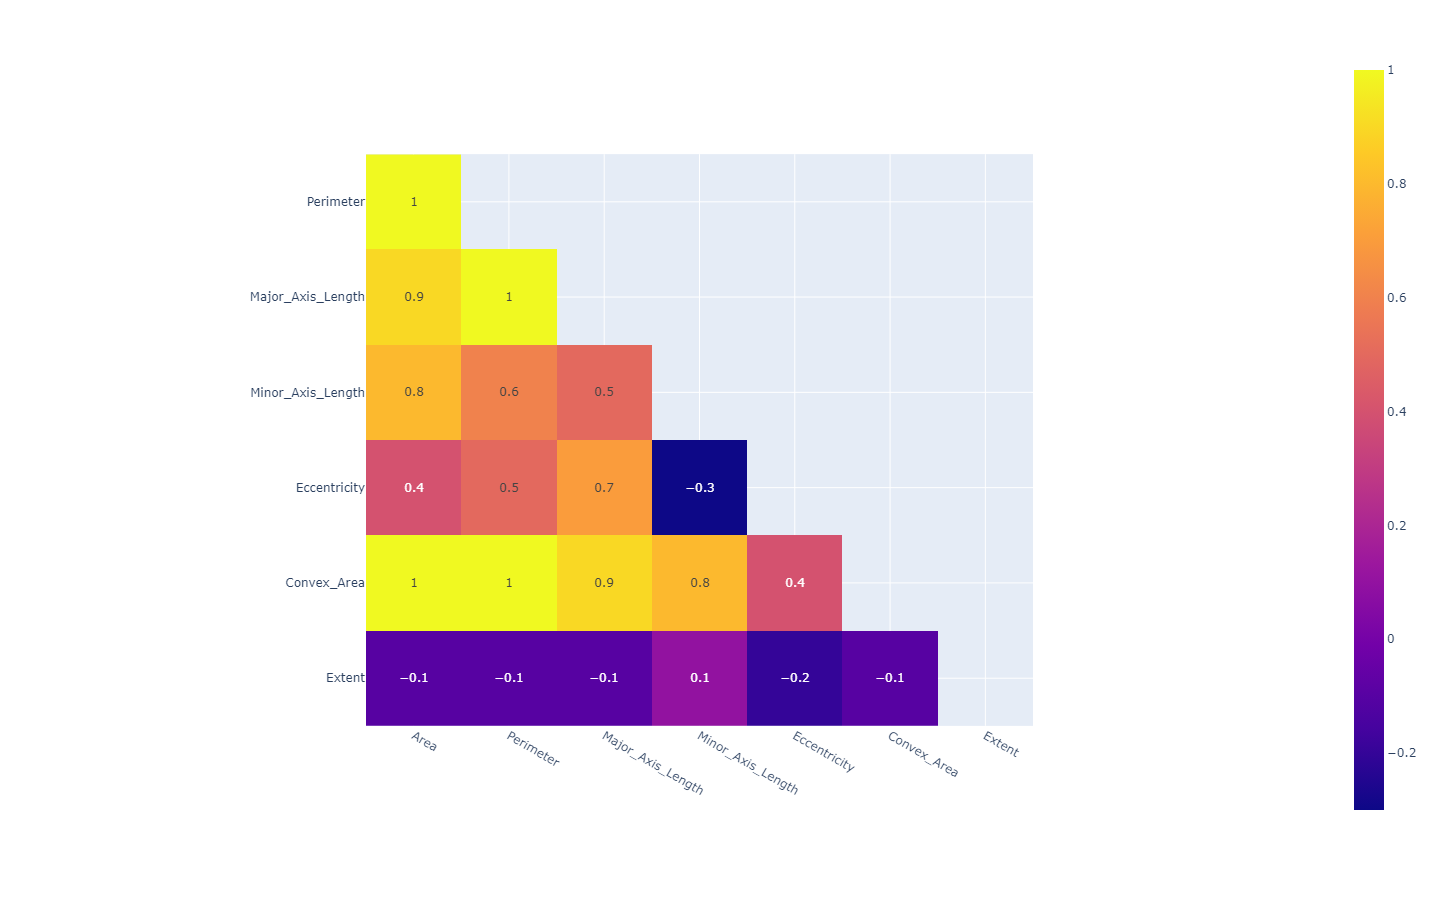

In [22]:
# --- CREATING A CORRELATION PLOT --- 
import plotly.express as px
import numpy as np

df = X
df_corr = df.corr().round(1)  
# Mask to matrix
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Viz
df_corr_viz = df_corr.mask(mask).dropna(how='all')

fig = px.imshow(df_corr_viz, text_auto=True)
fig.update_layout(height = 900, width=900)
fig.show()

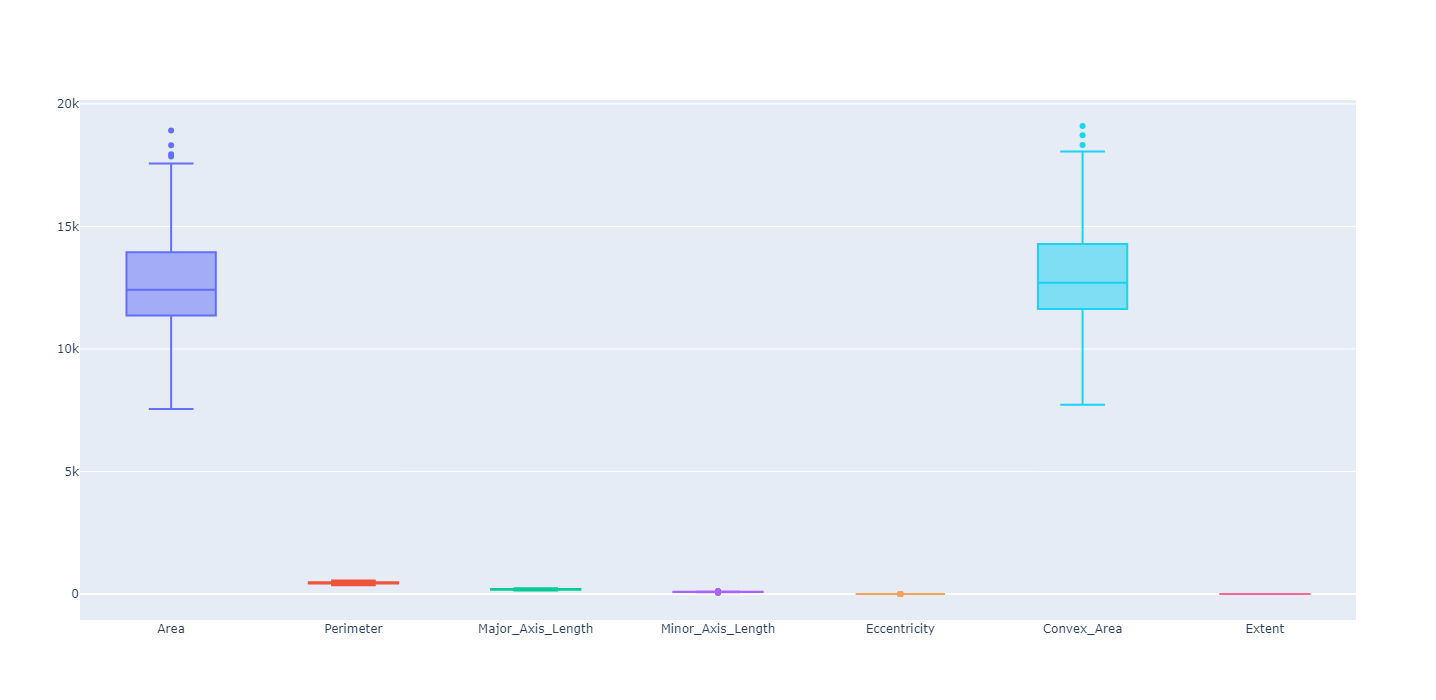

In [23]:
import plotly.graph_objects as go

fig = go.Figure()
for i in df.columns:
    fig.add_trace(go.Box(y=df[str(i)], name=str(i)))
fig.update_layout(showlegend=False,height = 700, width=800)
fig.show()

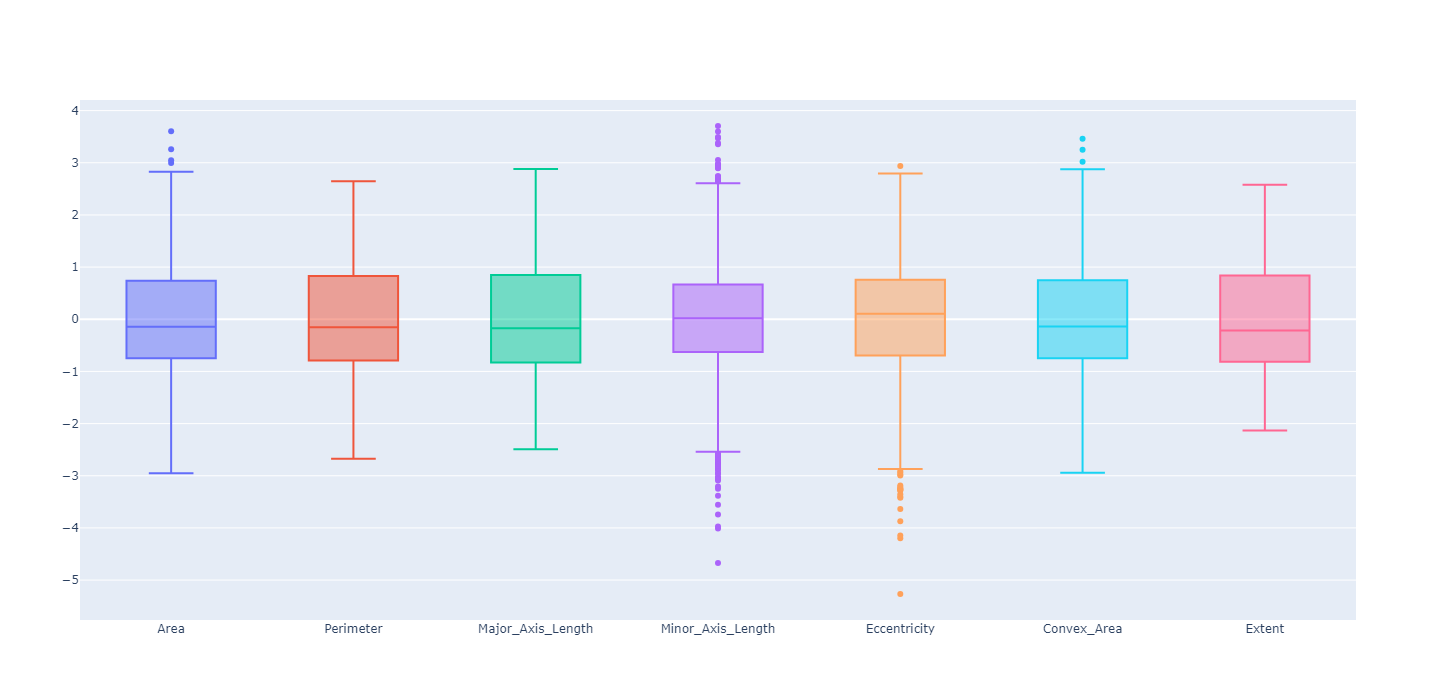

In [24]:
standard = (df-df.mean())/df.std()

fig = go.Figure()
for i in standard.columns:
    fig.add_trace(go.Box(y=standard[str(i)], name=str(i)))
fig.update_layout(showlegend=False,height = 700, width=800)
fig.show()

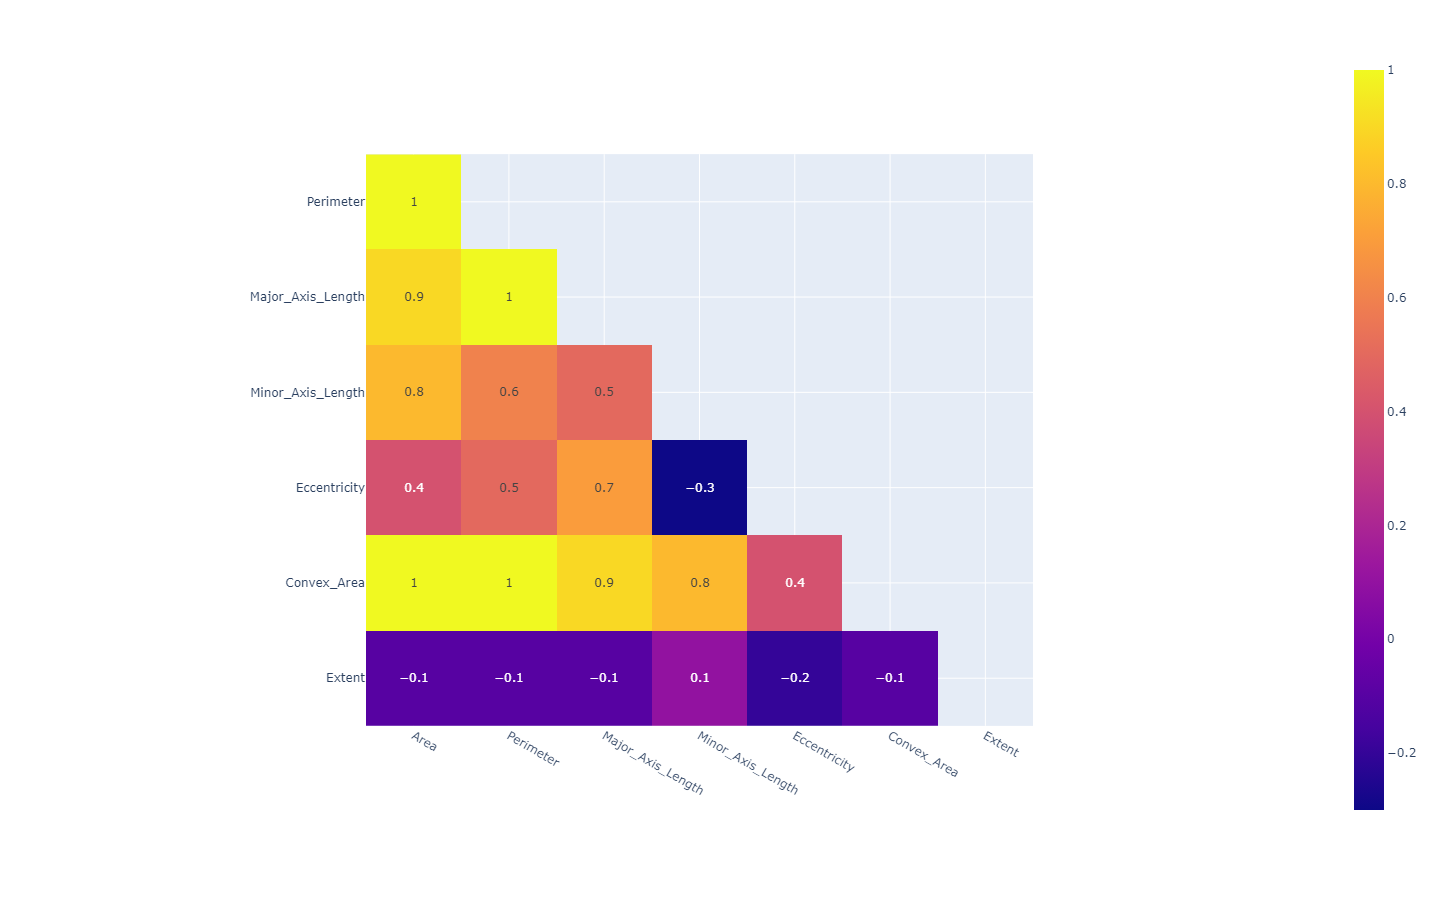

In [25]:
std_corr = standard.corr().round(1)  
# Mask to matrix
mask = np.zeros_like(std_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Viz
df_corr_viz = std_corr.mask(mask).dropna(how='all')
fig = px.imshow(df_corr_viz, text_auto=True)
fig.update_layout(height = 900, width=900)
fig.show()

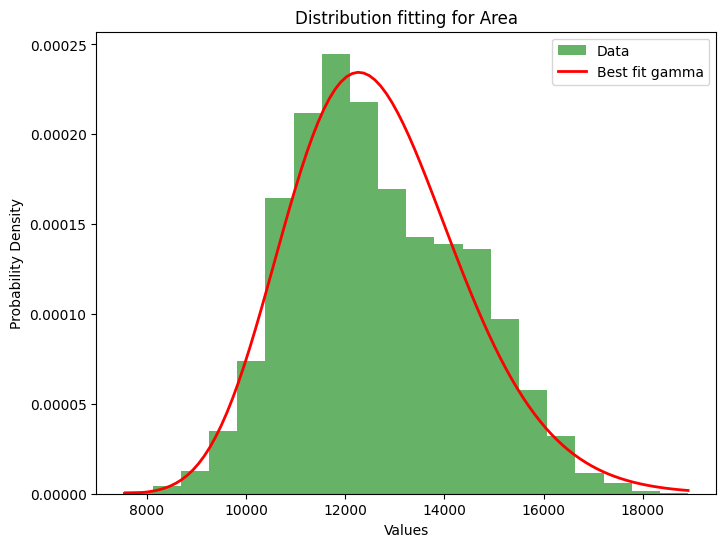

Best fitting distribution for Area: gamma
Parameters: (19.27481656105315, 5033.002311045395, 396.0984610145506)


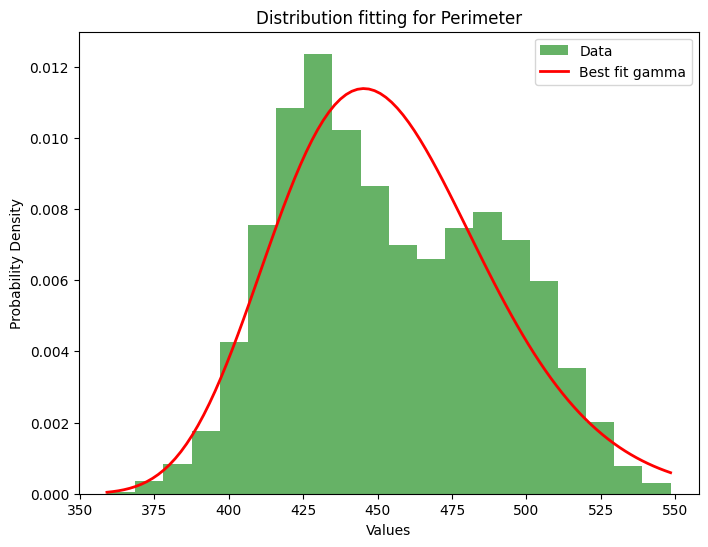

Best fitting distribution for Perimeter: gamma
Parameters: (16.450255573682448, 308.39737568841736, 8.865625485319152)


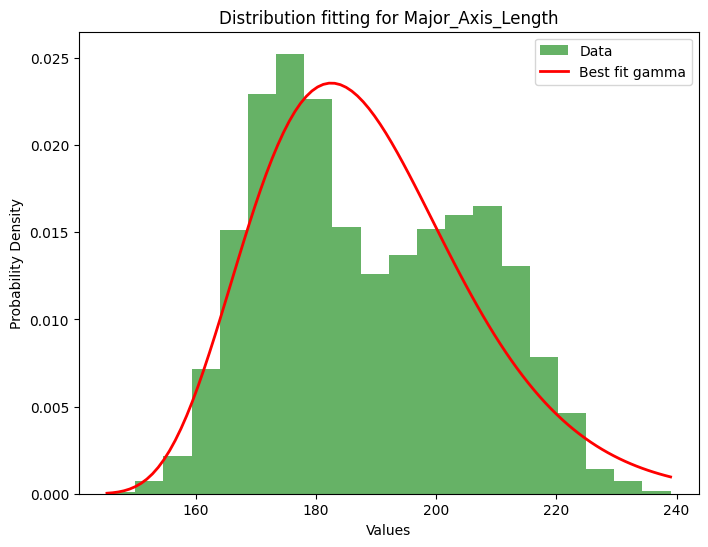

Best fitting distribution for Major_Axis_Length: gamma
Parameters: (8.288708619830864, 137.40266241230898, 6.198016964836624)


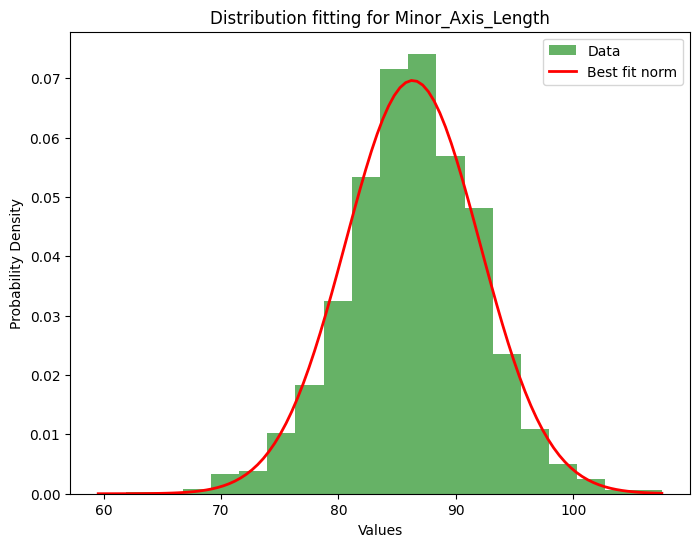

Best fitting distribution for Minor_Axis_Length: norm
Parameters: (86.3137503715958, 5.729065339823429)


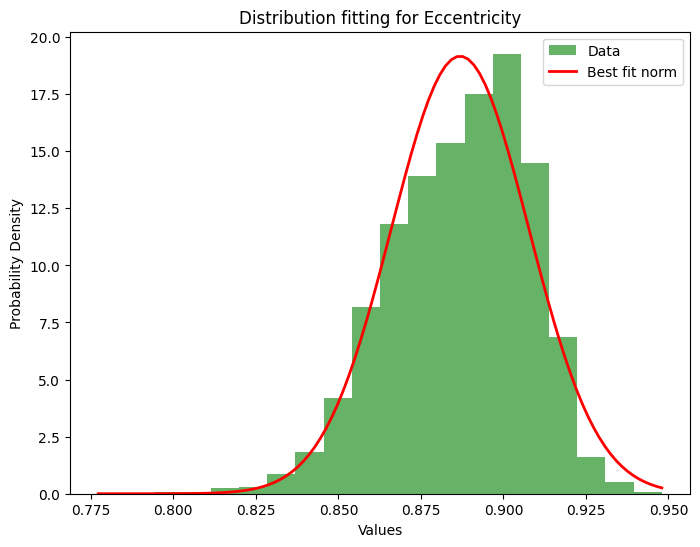

Best fitting distribution for Eccentricity: norm
Parameters: (0.8868705067435696, 0.0208149019484049)


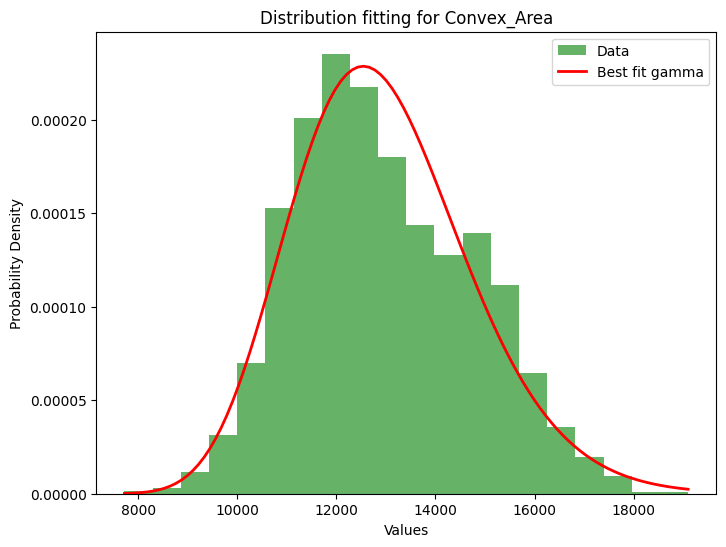

Best fitting distribution for Convex_Area: gamma
Parameters: (18.982471534156485, 5178.252985753044, 409.54855668741527)


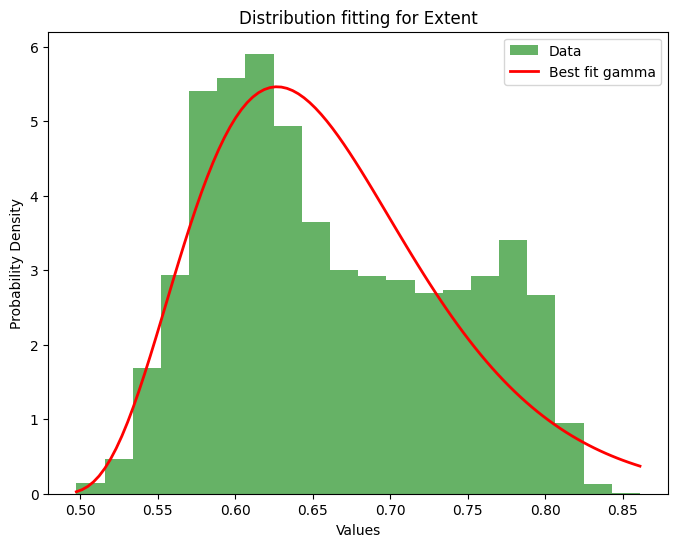

Best fitting distribution for Extent: gamma
Parameters: (5.172823199084279, 0.480591705671162, 0.03505677612673358)

Total distribution counts:
norm: 2
expon: 0
gamma: 5


In [26]:
# --- PROBABILITY DISTRIBUTION CLASSIFICATION ---
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

distributions = ['norm', 'expon', 'gamma']

# Initialize a dictionary to store counts of each distribution
distribution_counts = {dist_name: 0 for dist_name in distributions}

# Loop through each column in your DataFrame
for column in df.columns:
    data = df[column].dropna()  # Remove missing values if any
    
    # Fit each distribution to the data
    best_fit_name = ''
    best_fit_params = {}
    best_kstest_stat = np.inf
    
    for dist_name in distributions:
        dist = getattr(stats, dist_name)
        params = dist.fit(data)
        kstest_stat, _ = stats.kstest(data, dist_name, args=params)
        
        # Keep track of the best-fitting distribution based on KS test statistic
        if kstest_stat < best_kstest_stat:
            best_fit_name = dist_name
            best_fit_params = params
            best_kstest_stat = kstest_stat
    
    # Increment the count for the best-fitting distribution
    distribution_counts[best_fit_name] += 1
    
    # Plot the histogram of data and the best-fitting distribution
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=20, density=True, alpha=0.6, color='g', label='Data')
    
    dist = getattr(stats, best_fit_name)
    x = np.linspace(min(data), max(data), 100)
    pdf = dist.pdf(x, *best_fit_params)
    plt.plot(x, pdf, 'r-', lw=2, label='Best fit ' + best_fit_name)
    
    plt.title('Distribution fitting for {}'.format(column))
    plt.xlabel('Values')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

    print('Best fitting distribution for {}: {}'.format(column, best_fit_name))
    print('Parameters:', best_fit_params)

# summary of # of occurences for each distribution
print('\nTotal distribution counts:')
for dist_name, count in distribution_counts.items():
    print('{}: {}'.format(dist_name, count))

Enhanced Summary Statistics for Breast Cancer Wisconsin Dataset:

                    count          mean          std          min  \
Area               3810.0  12667.727559  1732.367706  7551.000000   
Perimeter          3810.0    454.239180    35.597081   359.100006   
Major_Axis_Length  3810.0    188.776222    17.448679   145.264465   
Minor_Axis_Length  3810.0     86.313750     5.729817    59.532406   
Eccentricity       3810.0      0.886871     0.020818     0.777233   
Convex_Area        3810.0  12952.496850  1776.972042  7723.000000   
Extent             3810.0      0.661934     0.077239     0.497413   

                            25%           50%           75%           max  \
Area               11370.500000  12421.500000  13950.000000  18913.000000   
Perimeter            426.144752    448.852493    483.683746    548.445984   
Major_Axis_Length    174.353855    185.810059    203.550438    239.010498   
Minor_Axis_Length     82.731695     86.434647     90.143677    107.542450

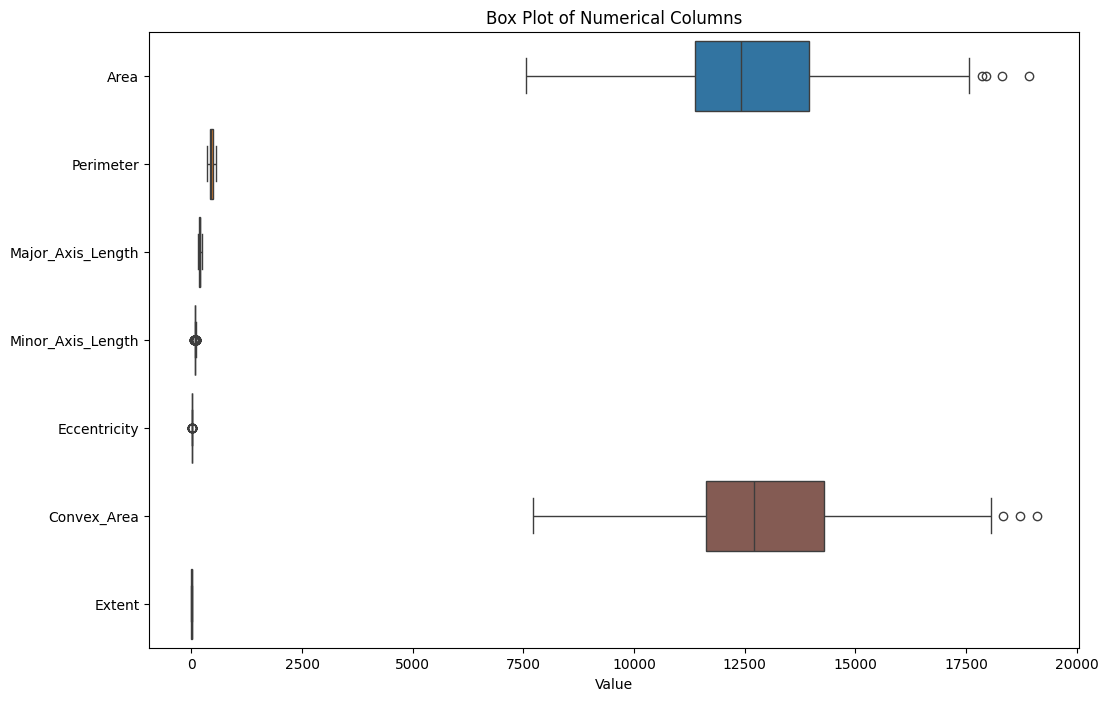

<Figure size 1200x800 with 0 Axes>

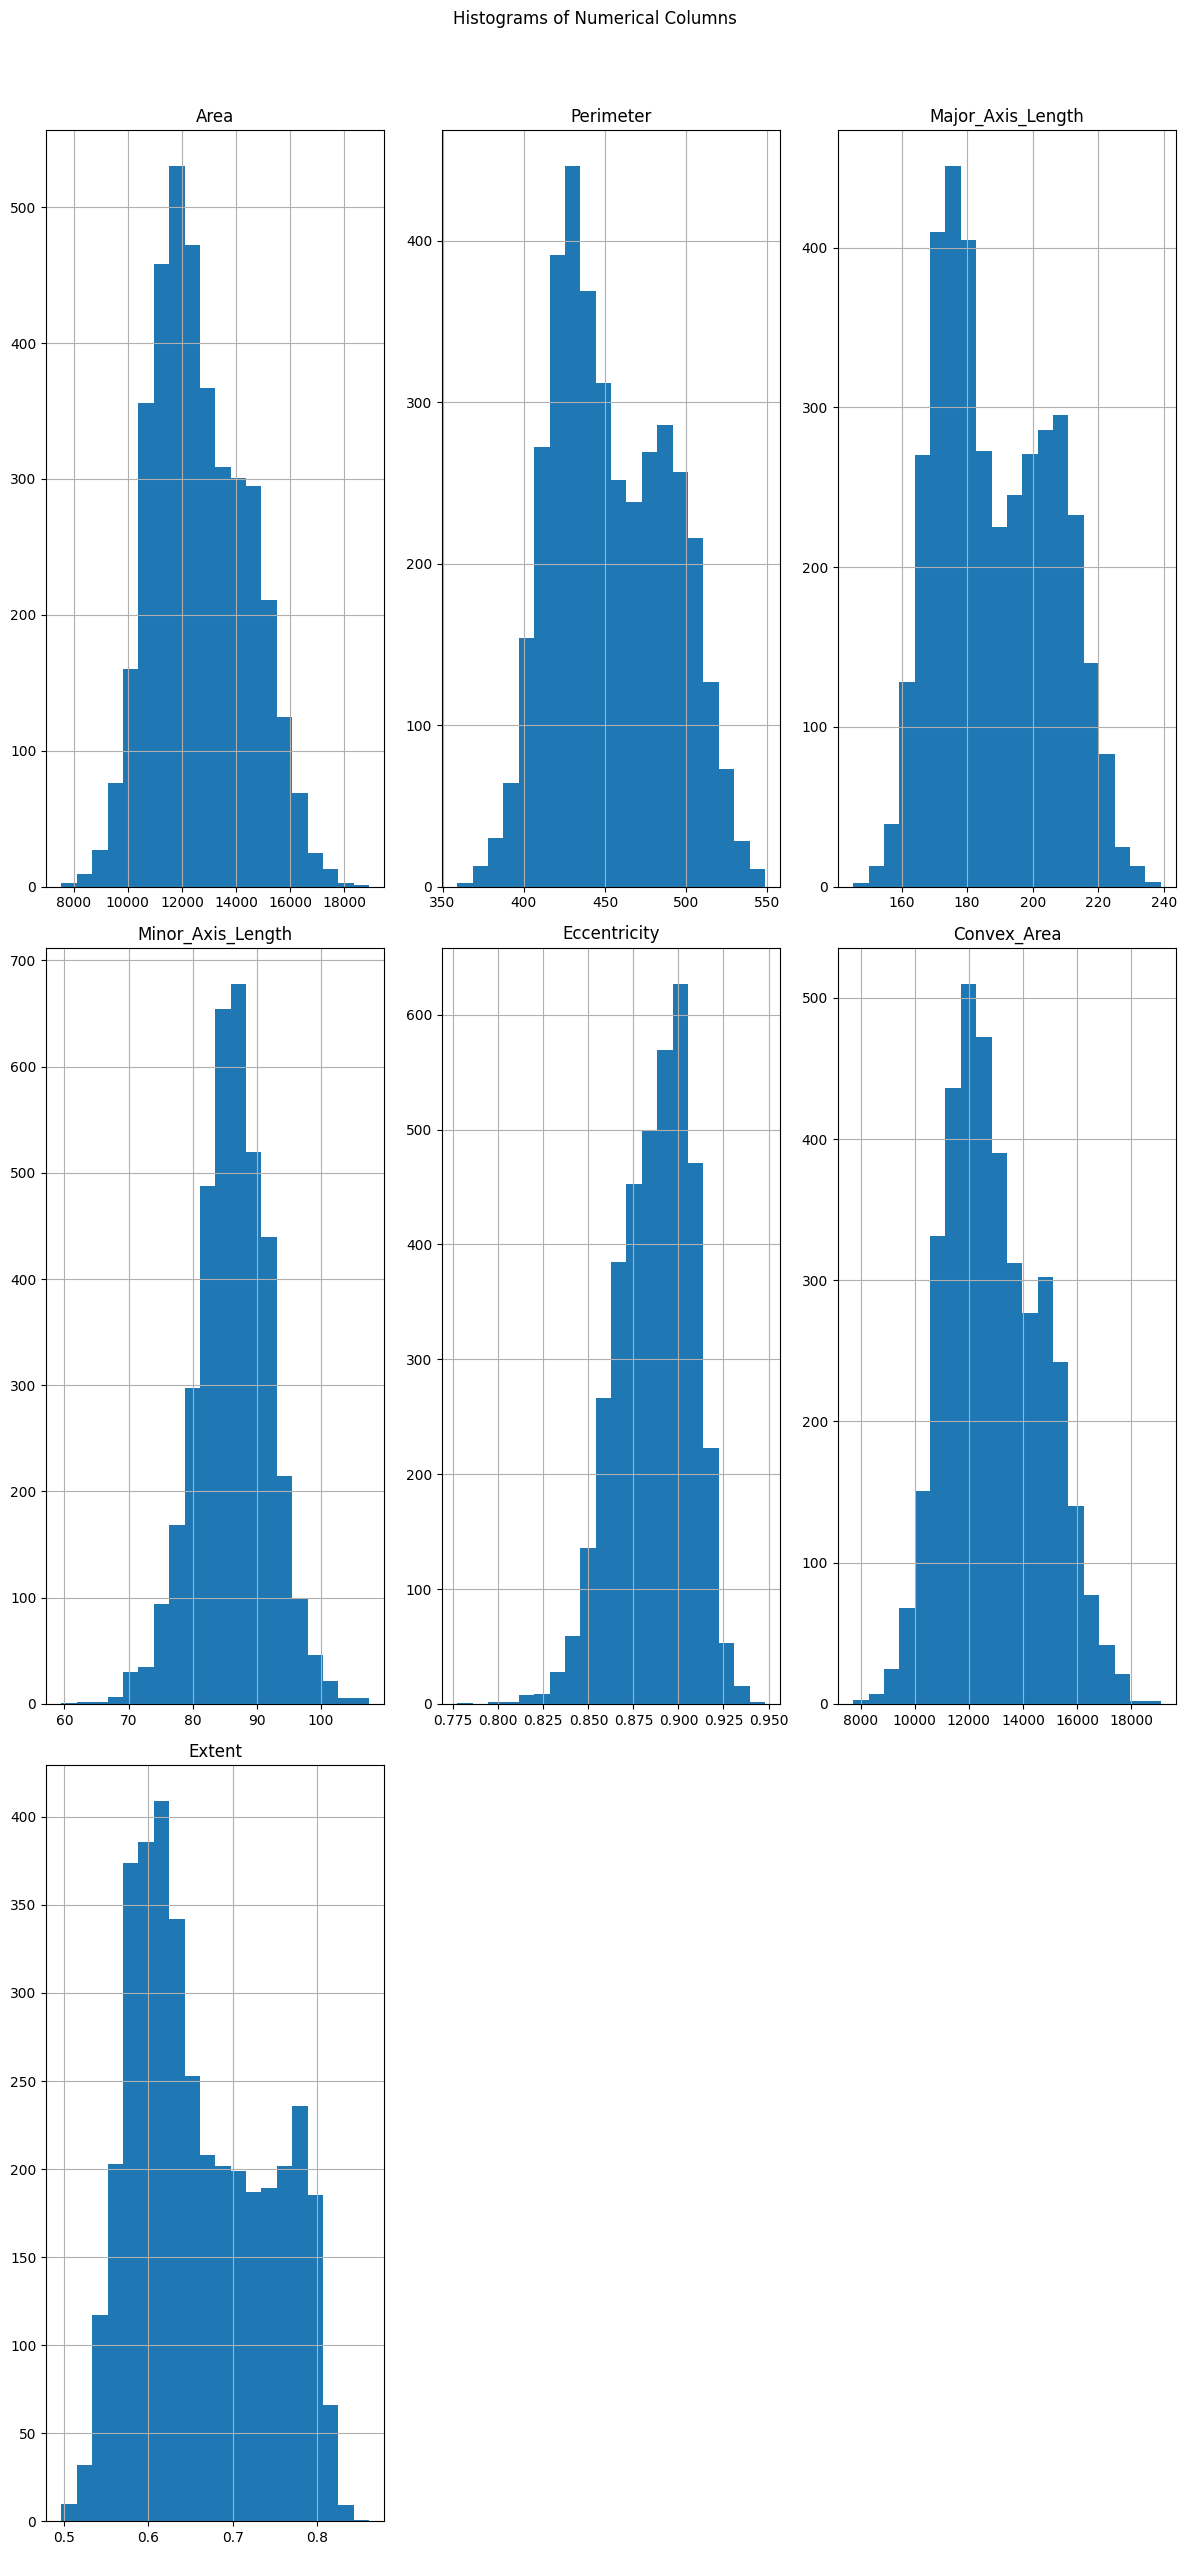

In [28]:
# --- SUMMARY STATISTICS ---
import pandas as pd
import math
import seaborn as sns

# Calculate summary statistics for numerical columns
summary_stats = df.describe()

# Transpose the summary statistics dfe for better visualization
summary_stats = summary_stats.T

# Calculate skewness and kurtosis for each numerical column
skewness = df.skew()
kurtosis = df.kurtosis()

# Calculate additional percentiles (e.g., 10th and 90th percentiles)
additional_percentiles = df.quantile([0.1, 0.9])

# Concatenate skewness, kurtosis, and additional percentiles to the summary statistics df
summary_stats['Skewness'] = skewness
summary_stats['Kurtosis'] = kurtosis
summary_stats = pd.concat([summary_stats, additional_percentiles.rename({0.1: '10%', 0.9: '90%'}).T], axis=1)

# Display the updated summary statistics
print("Enhanced Summary Statistics for Breast Cancer Wisconsin Dataset:\n")
print(summary_stats)

# Visualize the distribution of numerical columns using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')  # Horizontal box plots
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Value')  # Adjust the label to be more descriptive
plt.show()

# Calculate the number of numerical columns in your DataFrame
num_cols = df.shape[1]

# Determine the number of rows and columns for the layout dynamically
num_rows = math.ceil(num_cols / 3)  # Adjust the number of columns as needed
num_cols_per_subplot = min(3, num_cols)  # Maximum 3 columns per subplot

# Visualize the distribution of numerical columns using histograms
plt.figure(figsize=(12, 8))
df.hist(bins=20, figsize=(12, 25), layout=(num_rows, num_cols_per_subplot))  
plt.suptitle('Histograms of Numerical Columns', y=1.02)  
plt.tight_layout()  
plt.show()

# Hypothesis Test
### The Correlation Between Perimeter and Major Axis Length
<li> Null Hypothesis (H0): There is no correlation between Perimeter and Major Axis Length</li>
<li> 
Alternative Hypothesis (H1): There is a correlation between Perimeter and Major Axis Length</li>

In [32]:
# Extract columns
perimeter = df['Perimeter']
maj_axis_len = df['Major_Axis_Length']

# Remove missing values (NaNs) if any
perimeter.dropna(inplace=True)
maj_axis_len.dropna(inplace=True)

# Calculate mean compactness and concavity
mean_perimeter = 0
mean_maj_axis_len = 0
n = 0
for c, cc in zip(perimeter, maj_axis_len):
    mean_perimeter += c
    mean_maj_axis_len += cc
    n += 1
mean_perimeter /= n
mean_maj_axis_len /= n

# Calculate the correlation coefficient (Pearson correlation)
def pearson_correlation(x, y, mean_x, mean_y):
    n = 0
    numer = 0
    denom_x = 0
    denom_y = 0
    for xi, yi in zip(x, y):
        numer += (xi - mean_x) * (yi - mean_y)
        denom_x += (xi - mean_x) ** 2
        denom_y += (yi - mean_y) ** 2
        n += 1
    denom = (denom_x * denom_y) ** 0.5
    corr_coeff = numer / (n * denom)
    return corr_coeff

corr_coeff = pearson_correlation(perimeter, maj_axis_len, mean_perimeter, mean_maj_axis_len)
print("Correlation coefficient (Pearson correlation):", corr_coeff)

# Perform significance test for correlation
def significance_test_correlation(r, n, alpha=0.05):
    t = r * ((n - 2) ** 0.5) / (((1 - r ** 2) ** 0.5))
    degrees_of_freedom = n - 2
    critical_value = t / (((2 * degrees_of_freedom) ** 0.5))

    # Check if absolute value of t-statistic exceeds critical value
    if abs(t) > abs(critical_value):
        return True  # reject null hypothesis
    else:
        return False  # fail to reject null hypothesis

result = significance_test_correlation(corr_coeff, n)
if result:
    print("There is a significant correlation between perimeter and major axis length.")
else:
    print("There is no significant correlation between perimeter and major axis length.")


Correlation coefficient (Pearson correlation): 0.00025508778511951755
There is a significant correlation between perimeter and major axis length.


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_12200\1345009819.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_12200\1345009819.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

